<a href="https://colab.research.google.com/github/DigZator/DigitClassifierMNIST/blob/main/CNN_PyTorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np

In [2]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

In [3]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=trans)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=trans)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
nepochs = 10
nclasses = 10
batch_size = 100
learning_rate = 0.001

In [5]:
train_loader = DataLoader(dataset = mnist_trainset, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(dataset = mnist_testset, batch_size = batch_size, shuffle = False)

In [6]:
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()

    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 32, kernel_size = 5, stride = 1, padding = 2)
    self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 5, stride = 1, padding = 2)

    self.drop_out = nn.Dropout()

    self.fc1 = nn.Linear(in_features = 64*7*7, out_features = 1000)
    self.fc2 = nn.Linear(in_features = 1000, out_features = 10)
    #self.fc3 = nn.Linear(in_features = 128, out_features = 10)
  
  def forward(self, x):
    #Conv Layer 1
    out = self.conv1(x)
    out = nn.functional.relu(out)
    mp = nn.MaxPool2d(kernel_size = 2, stride = 2)
    out = mp(out)

    #Conv Layer 2
    out = self.conv2(out)
    out = nn.functional.relu(out)
    mp = nn.MaxPool2d(kernel_size = 2, stride = 2)
    out = mp(out)

    #Flattening
    out = out.reshape(out.size(0),-1)

    #Dropout
    out = self.drop_out(out)

    #Fully Connected
    out = self.fc1(out)
    out = self.fc2(out)
    #out = self.fc3(out)
    return out

In [7]:
model = ConvNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [8]:
total_step = len(train_loader)
loss_list = []
acc_list = []

for epoch in range(nepochs):
  for i,(images, labels) in enumerate(train_loader):
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total = labels.size(0)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    acc_list.append(correct/total)

    if (i+1)%100 == 0:
      print("Epoch : ", epoch, "Loss : ", loss.item(), "Accuracy : ", (correct / total)*100)


Epoch :  0 Loss :  0.15346062183380127 Accuracy :  94.0
Epoch :  0 Loss :  0.147516667842865 Accuracy :  95.0
Epoch :  0 Loss :  0.10574160516262054 Accuracy :  95.0
Epoch :  0 Loss :  0.13457992672920227 Accuracy :  95.0
Epoch :  0 Loss :  0.13554035127162933 Accuracy :  96.0
Epoch :  0 Loss :  0.036670323461294174 Accuracy :  99.0
Epoch :  1 Loss :  0.044362567365169525 Accuracy :  97.0
Epoch :  1 Loss :  0.08810246735811234 Accuracy :  97.0
Epoch :  1 Loss :  0.21018382906913757 Accuracy :  93.0
Epoch :  1 Loss :  0.05504921078681946 Accuracy :  98.0
Epoch :  1 Loss :  0.08136285096406937 Accuracy :  99.0
Epoch :  1 Loss :  0.052996136248111725 Accuracy :  98.0
Epoch :  2 Loss :  0.08688050508499146 Accuracy :  97.0
Epoch :  2 Loss :  0.032365091145038605 Accuracy :  99.0
Epoch :  2 Loss :  0.07219164073467255 Accuracy :  97.0
Epoch :  2 Loss :  0.1250460147857666 Accuracy :  97.0
Epoch :  2 Loss :  0.007125594653189182 Accuracy :  100.0
Epoch :  2 Loss :  0.09326263517141342 Accura

Prediction :  7
Test Accuracy :  99.14


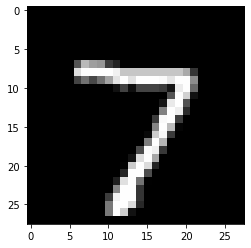

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  count = 0
  for images, labels in test_loader:
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    while (count < 1):
      plt.imshow(images[count][0], cmap='gray', interpolation = 'none')
      print("Prediction : ", int(predicted[count]))
      count = count + 1

  print("Test Accuracy : ", (correct/total)*100)